## SEABORN

- library that builds on matplotlib

- integrated with pandas

-relational plots (relplots), distribution plots (distplots), categorical plots (catplots)


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from pydataset import data


In [3]:
# look for all datasets available in seaborn

print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'taxis', 'tips', 'titanic']


In [4]:
# Option 1 : Load directly from sns dataset
tips = sns.load_dataset('tips')

In [5]:
data('tips', show_doc = True)

tips

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Tipping data

### Description

One waiter recorded information about each tip he received over a period of a
few months working in one restaurant. He collected several variables:

### Usage

    data(tips)

### Format

A data frame with 244 rows and 7 variables

### Details

  * tip in dollars, 

  * bill in dollars, 

  * sex of the bill payer, 

  * whether there were smokers in the party, 

  * day of the week, 

  * time of day, 

  * size of the party. 

In all he recorded 244 tips. The data was reported in a collection of case
studies for business statistics (Bryant & Smith 1995).

### References

Bryant, P. G. and Smith, M (1995) _Practical Data Analysis: Case Studies in
Business Statistics_. Homewood, IL: Richard D. Irwin Publishing:




In [6]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


## Relational Plots

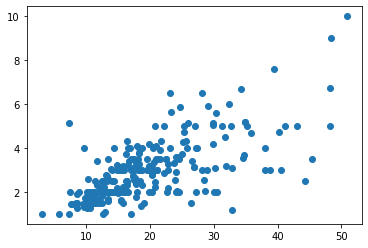

In [10]:
# scatterplot in matplotlib

plt.scatter(tips.total_bill, tips.tip)

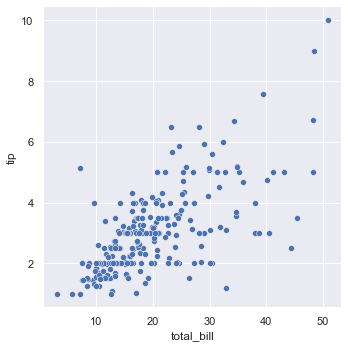

In [18]:
sns.set_theme() ## changes the theme to sns default
sns.relplot(data = tips, x = 'total_bill', y = 'tip')

## scatterplot  by gender in matplotlib

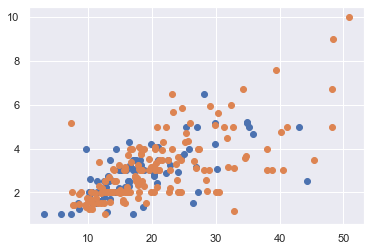

In [23]:
plt.scatter(tips[tips.sex == 'Female'].total_bill, tips[tips.sex == 'Female'].tip) #bill v. tip, Female
plt.scatter(tips[tips.sex == 'Male'].total_bill, tips[tips.sex == 'Male'].tip) #bill v. tip, Male



## scatterplot  by gender in Seaborn

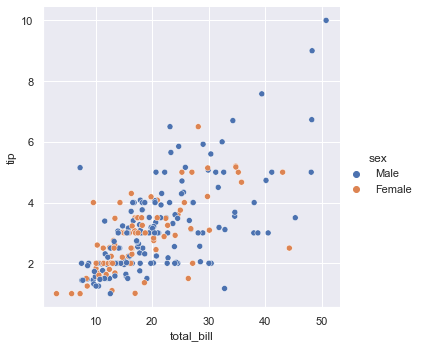

In [24]:
# visualize if relationship is different for smoker vs non-smoker (use hue argument)

sns.relplot(data = tips, x = 'total_bill', y = 'tip', hue = 'sex')



### seaborn is a little more efficient at this same task ^^

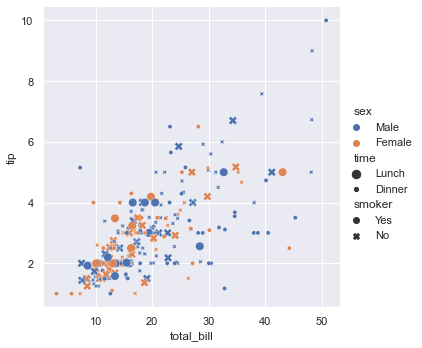

In [29]:
## More manipulations, using hue, size, style


sns.relplot(data = tips, x = 'total_bill', y = 'tip', hue = 'sex', style = 'smoker', size = 'time')

## Relplot with kind argument

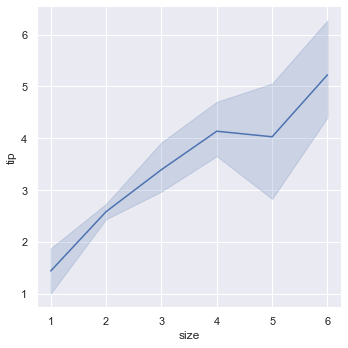

In [31]:
## shaded area is 95% confidence interval
sns.relplot(data = tips, x = 'size', y = 'tip', kind = 'line')

 Seaborn is bootstrapping to extrapolate this confidence interval

### Small multiple (https://en.wikipedia.org/wiki/Small_multiple)
- similar graphs or charts using the same scale and axes
- easy to compare


- Main idea: Pick a categorical features and create a chart for each category

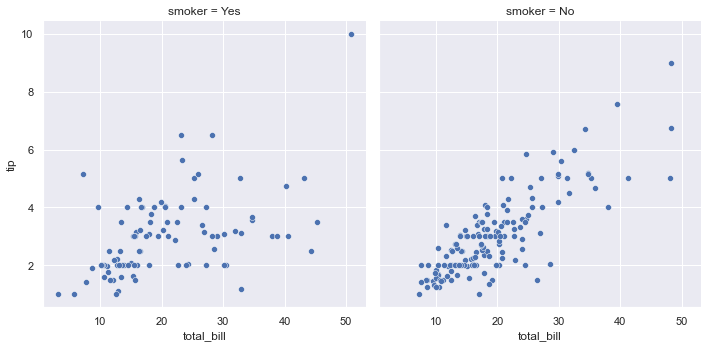

In [34]:
#  FacetGrid with 'col'

sns.relplot(data = tips, x = 'total_bill', y = 'tip', col = 'smoker')

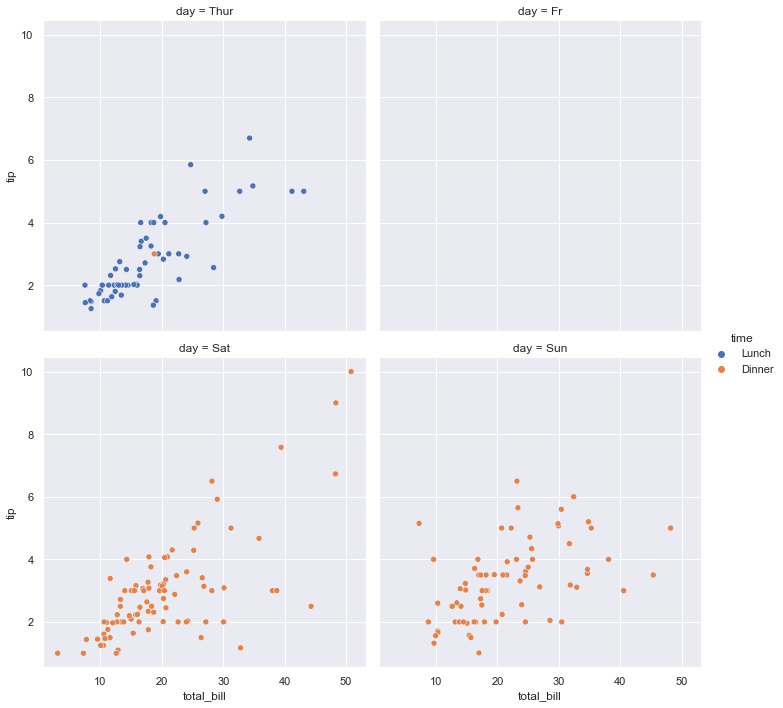

In [37]:
sns.relplot(data = tips,
            x = 'total_bill', 
            y = 'tip', 
            col = 'day', 
            hue = 'time', 
            col_order = ['Thur', 'Fr', 'Sat', 'Sun'],
            col_wrap = 2)

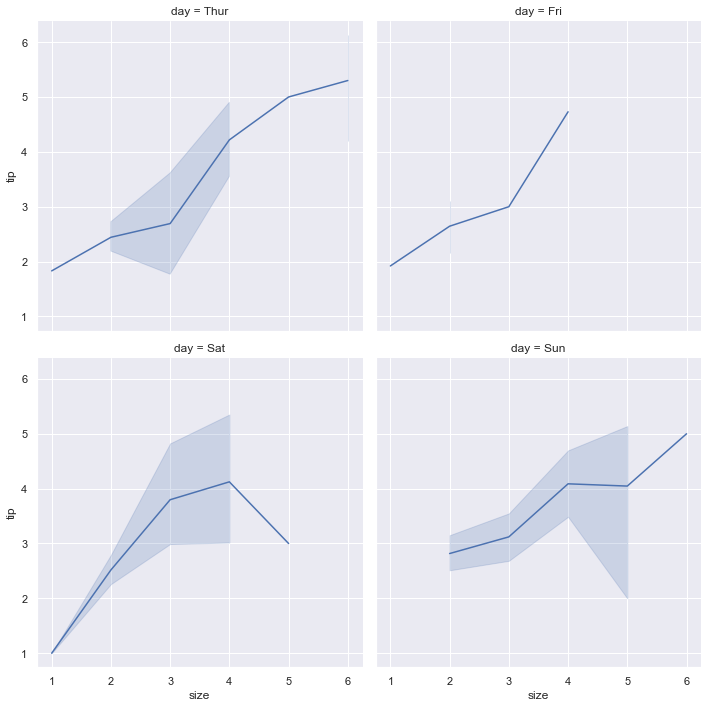

In [40]:
# Facetgrid with lineplot

sns.relplot(data = tips, 
            x = 'size', 
            y = 'tip', 
            kind = 'line', 
            col = 'day',
            col_wrap = 2)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

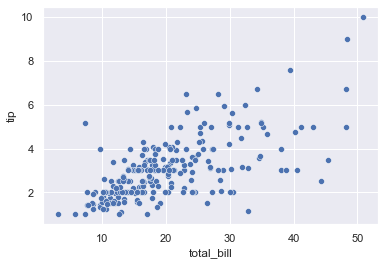

In [41]:
# scatterplot - returns an axes level object
sns.scatterplot(data = tips, x ='total_bill', y = 'tip')

## Distributions: displot

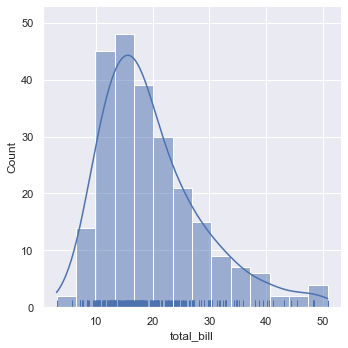

In [43]:
# displot for total_bill (hist, kde, rug)

sns.displot(data = tips, 
            x = 'total_bill', 
            kde = True, 
            rug = True)
#rug gives you a visual frequency distribution
# kde = kernel density estimation - dist line

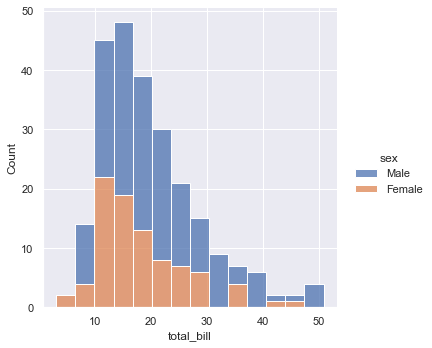

In [45]:
sns.displot(data = tips, 
            x = 'total_bill', 
            hue = 'sex',
            multiple = 'stack')

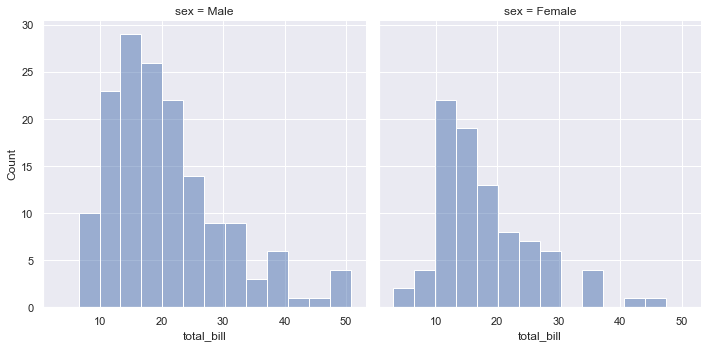

In [49]:
sns.displot(data = tips, 
            x = 'total_bill', 
            col = 'sex', 
            alpha = 0.5) 

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

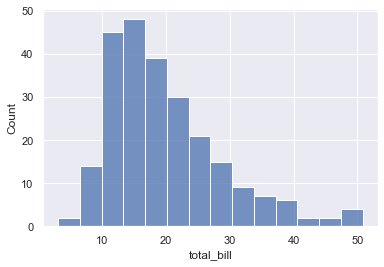

In [51]:
sns.histplot(data = tips, x = 'total_bill')


## CATPLOT

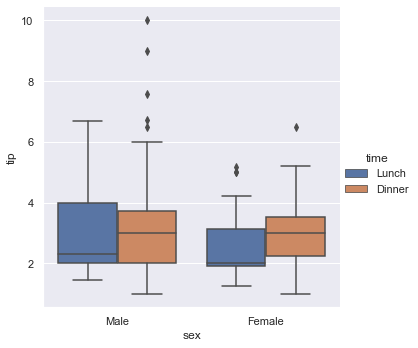

In [56]:
# we can make boxplot with kind = 'box' argument. 
# Returns a figure level object

sns.catplot(data = tips, 
            y = 'tip',
            kind = 'box',
            x = 'sex',
            hue = 'time')

In [57]:
#descriptive stats for tips
tips.tip.describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

<AxesSubplot:>

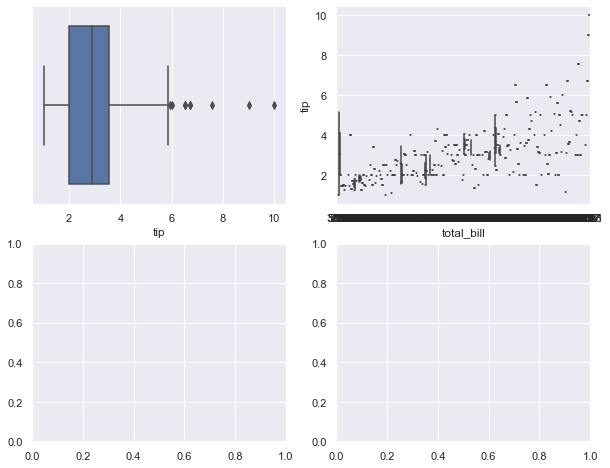

In [61]:
#  Create a figure with 4 subplots (Make sure to use axes-level seaborn functions)

# Create a figure with 4 boxplots
plt.figure(figsize = (10,8))

# first subplot
plt.subplot(221)
sns.boxplot(data = tips,
            x ='tip')

# Second subplot
plt.subplot(222)
sns.boxplot(data = tips, 
            y = 'tip', 
            x ='total_bill')

#third subplot
plt.subplot(223)

# 4th subplot
plt.subplot(224)

<AxesSubplot:ylabel='tip'>

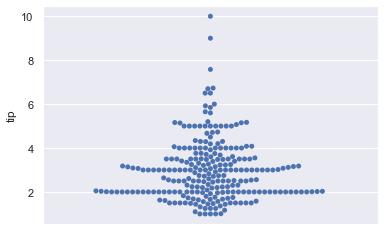

In [63]:
sns.swarmplot(data = tips, y = 'tip')

<AxesSubplot:xlabel='sex', ylabel='tip'>

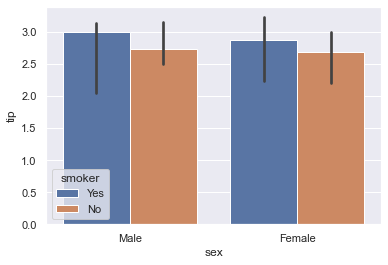

In [73]:
# bar plot 'tip' by gender. Shows mean for each category instead with CI

sns.barplot(data = tips,
            y = 'tip',
            x = 'sex',
            hue = 'smoker',
            estimator = np.median)

## pairplot

- look at relationships between your variables in the same place

- tool to understand the data

- will graph by dtype = float or int

In [74]:
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

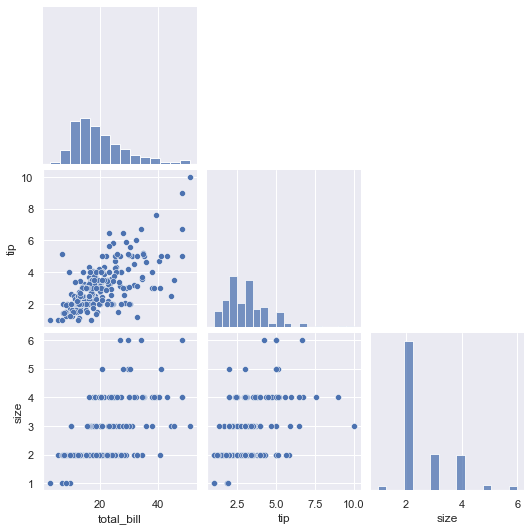

In [76]:
sns.pairplot(tips, corner = True)

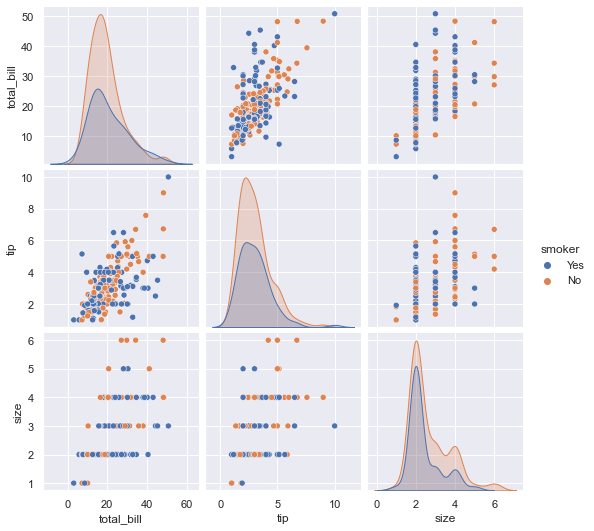

In [77]:
sns.pairplot(tips, hue = 'smoker')

In [78]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [79]:
# use different plot type. 'reg' plot instead of 'scatter'

# sns.pairplot(tips, diag_kind= 'hist',
#             diag_kws= {'color': 'gray'},
#             kind = 'reg',
#             plot_kws={'ci': None})

### Heatmap

In [81]:
#crosstab of time vs smoker
ctab = pd.crosstab(tips.time, tips.smoker)
ctab

smoker,Yes,No
time,,
Lunch,23,45
Dinner,70,106


<AxesSubplot:xlabel='smoker', ylabel='time'>

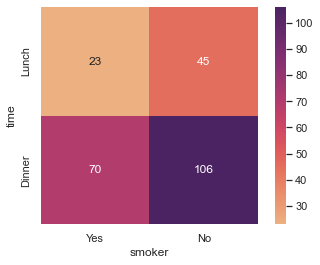

In [90]:
#create a heatmap

sns.heatmap(ctab, annot = True, square = True, fmt = '0.0f', cmap = 'flare')
## eyes go to darker area first. higher number = darker color

<AxesSubplot:xlabel='smoker', ylabel='time'>

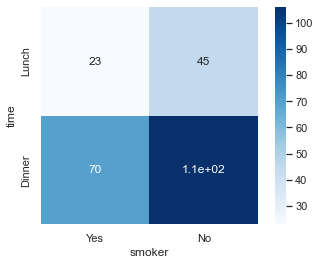

In [91]:
sns.heatmap(ctab, cmap = 'Blues', annot = True, square = True)

Seaborn color palettes: https://seaborn.pydata.org/tutorial/color_palettes.html
Check out this great post too: https://medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f

SEQUENTIAL: e.g. different shades of same color. Appropriate when data range from relatively low or uninteresting values to relatively high or interesting values (or vice versa)
DIVERGING - highlight both low and high values

In [92]:
# Heatmap using mpg dataset

mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [95]:
# calculate correlation for numeric variables using panda's .corr() method

mpg.corr()

,displ,year,cyl,cty,hwy
displ,1.000000,0.147843,0.930227,-0.798524,-0.766020
year,0.147843,1.000000,0.122245,-0.037232,0.002158
cyl,0.930227,0.122245,1.000000,-0.805771,-0.761912
cty,-0.798524,-0.037232,-0.805771,1.000000,0.955916
hwy,-0.766020,0.002158,-0.761912,0.955916,1.000000


In [97]:
labels = ['Displacement', 'Model Year', 'cylinders', 'City MPG', 'Highway MPG']

<AxesSubplot:>

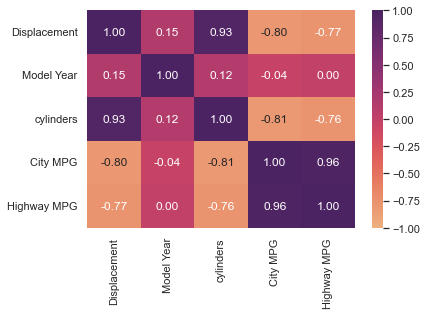

In [102]:
# heatmap for correlation table above

sns.heatmap(mpg.corr(),
            cmap = 'flare', 
            annot = True,
            fmt = '0.2f',
            center = 0,
            vmin = -1,
            xticklabels = labels,
            yticklabels = labels)